In [97]:
#Loading dataset
import pandas as pd
df=pd.read_csv("Mall_Customers.csv")
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [98]:
#Dropping CustomerID column as it is not required in clustering
df=df.drop(columns="CustomerID")
df.head(10)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [99]:
#Onehot encoding
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False).set_output(transform='pandas')
new_cols=encoder.fit_transform(df[["Genre"]])
df=pd.concat([df.drop(columns="Genre"),new_cols],ignore_index=True)
df.head(10)

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,19.0,15.0,39.0,NaN,NaN
1,21.0,15.0,81.0,NaN,NaN
2,20.0,16.0,6.0,NaN,NaN
3,23.0,16.0,77.0,NaN,NaN
4,31.0,17.0,40.0,NaN,NaN
5,22.0,17.0,76.0,NaN,NaN
6,35.0,18.0,6.0,NaN,NaN
7,23.0,18.0,94.0,NaN,NaN
8,64.0,19.0,3.0,NaN,NaN
9,30.0,19.0,72.0,NaN,NaN


In [100]:
from sklearn.preprocessing import StandardScaler
X=df[['Annual Income (k$)','Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

In [101]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia=[]
for k in range(1,21):
    model=KMeans(n_clusters=k,random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.plot(range(1,21),inertia,marker='x')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('intertia')
plt.show()

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
model=KMeans(n_clusters=5,random_state=42)
model.fit(X_scaled)
labels=model.predict(X_scaled)

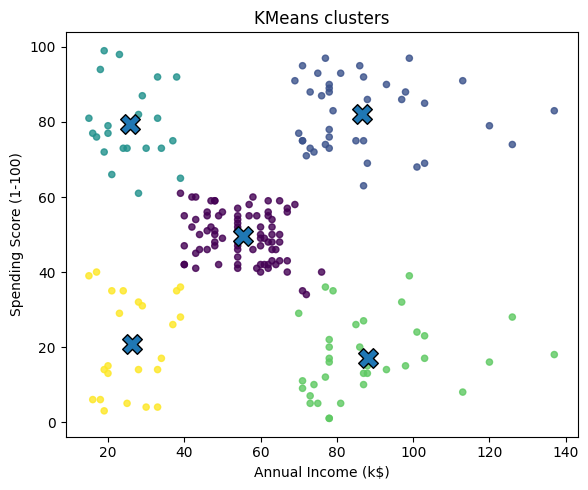

In [ ]:
centroids = scaler.inverse_transform(model.cluster_centers_)
plt.figure(figsize=(6,5))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], s=20, alpha=0.8, c=labels)
plt.scatter(centroids[:,0], centroids[:,1], s=200, marker='X', edgecolors='black')
plt.title('KMeans clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.tight_layout()
plt.show()